In [1]:
import datajoint as dj
import numpy as np
import datetime
import math
import os

#from cloudvolume import CloudVolume
#from collections import Counter
#from funconnect import ta3



In [2]:
import cgal_Segmentation_Module as csm

In [3]:
#setting the address and the username
dj.config['database.host'] = '10.28.0.34'
dj.config['database.user'] = 'celiib'
dj.config['database.password'] = 'newceliipass'
dj.config['safemode']=True
dj.config["display.limit"] = 10


# user: celiib
# pass: newceliipass
# host: at-database.ad.bcm.edu
# schemas: microns_% and celiib_%

In [4]:
schema = dj.schema('microns_pinky')
pinky = dj.create_virtual_module('pinky', 'microns_pinky')

Connecting celiib@10.28.0.34:3306


In [5]:
pinky.Decimation35ExcitatoryStitchedMesh()

segmentation segmentation id,segment_id segment id unique within each Segmentation,decimation_ratio,n_vertices,n_triangles,vertices,triangles
3,648518346341371119,0.35,223704,446048,=BLOB=,=BLOB=
3,648518346349386137,0.35,28326,56385,=BLOB=,=BLOB=
3,648518346349470171,0.35,385617,769377,=BLOB=,=BLOB=
3,648518346349471156,0.35,272711,547833,=BLOB=,=BLOB=
3,648518346349471500,0.35,257282,521221,=BLOB=,=BLOB=
3,648518346349471562,0.35,452678,902707,=BLOB=,=BLOB=
3,648518346349471565,0.35,763508,1523223,=BLOB=,=BLOB=
3,648518346349471910,0.35,694566,1397645,=BLOB=,=BLOB=
3,648518346349472574,0.35,554386,1117235,=BLOB=,=BLOB=
3,648518346349472601,0.35,515112,1027953,=BLOB=,=BLOB=


In [7]:
schema.jobs

table_name className of the table,key_hash key hash,"status if tuple is missing, the job is available",key structure containing the key,error_message error message returned if failed,error_stack error stack if failed,user database user,host system hostname,pid system process id,connection_id connection_id(),timestamp automatic timestamp
__component_auto_segment_whole_stitch,4c6e641417ba4cd09f01189b30e169a6,reserved,=BLOB=,,=BLOB=,celiib@10.28.0.81,20812b49dcd8,25316,67852,2019-06-09 15:29:54
__decimation35_excitatory_stitched_mesh,017737e174b0e0fef013726613137878,reserved,=BLOB=,,=BLOB=,celiib@10.21.18.111,starfox,6914,67200,2019-06-09 16:53:16
__decimation35_excitatory_stitched_mesh,07b959497981d946aed32715701044b5,reserved,=BLOB=,,=BLOB=,celiib@10.70.0.219,Brendans-MacBook-Pro.local,32938,65951,2019-06-09 05:49:57
__decimation35_excitatory_stitched_mesh,0ce466a0321e102e31fa8903d2620dea,reserved,=BLOB=,,=BLOB=,celiib@10.21.18.111,starfox,7503,67274,2019-06-09 15:47:56
__decimation35_excitatory_stitched_mesh,1175609f10546c45b20f6c413cf968b2,reserved,=BLOB=,,=BLOB=,celiib@10.21.18.111,starfox,7928,67311,2019-06-09 17:10:06
__decimation35_excitatory_stitched_mesh,167205a0cab2d84b63ee9ecf2b2f8a6d,reserved,=BLOB=,,=BLOB=,celiib@10.21.18.111,starfox,7776,67328,2019-06-09 16:53:46
__decimation35_excitatory_stitched_mesh,49d51ba9d29efbcd982e5ef790364e23,reserved,=BLOB=,,=BLOB=,celiib@10.21.18.111,starfox,7966,67310,2019-06-09 17:01:21
__decimation35_excitatory_stitched_mesh,50b0db2d085f67d49082cff2f3db4a70,reserved,=BLOB=,,=BLOB=,celiib@10.21.18.111,starfox,7814,67327,2019-06-09 16:05:13
__decimation35_excitatory_stitched_mesh,9be9fbd6434981011d984b214eb80a4d,reserved,=BLOB=,,=BLOB=,celiib@10.21.18.111,starfox,7852,67317,2019-06-09 17:15:50
__decimation35_excitatory_stitched_mesh,bf5bf98b1ad98e64f08f257c1b17d276,reserved,=BLOB=,,=BLOB=,celiib@10.21.18.111,starfox,7465,67268,2019-06-09 17:15:17


In [ ]:
#if temp folder doesn't exist then create it
if (os.path.isdir(os.getcwd() + "/temp")) == False:
    os.mkdir("temp")


In [ ]:
import os
import pathlib

##write the OFF file for the neuron
def write_Whole_Neuron_Off_file(neuron_ID,vertices=[], triangles=[]):
    #primary_key = dict(segmentation=1, segment_id=segment_id, decimation_ratio=0.35)
    #vertices, triangles = (mesh_Table_35 & primary_key).fetch1('vertices', 'triangles')
    
    num_vertices = (len(vertices))
    num_faces = len(triangles)
    
    #get the current file location
    file_loc = pathlib.Path.cwd() / "temp"
    filename = "neuron_" + str(neuron_ID)
    path_and_filename = file_loc / filename
    
    #print(file_loc)
    #print(path_and_filename)
    
    #open the file and start writing to it    
    f = open(str(path_and_filename) + ".off", "w")
    f.write("OFF\n")
    f.write(str(num_vertices) + " " + str(num_faces) + " 0\n" )
    
    
    #iterate through and write all of the vertices in the file
    for verts in vertices:
        f.write(str(verts[0]) + " " + str(verts[1]) + " " + str(verts[2])+"\n")
    
    #print("Done writing verts")
        
    for faces in triangles:
        f.write("3 " + str(faces[0]) + " " + str(faces[1]) + " " + str(faces[2])+"\n")
    
    print("Done writing OFF file")
    #f.write("end")
    
    return str(path_and_filename),str(filename)

In [ ]:
#(schema.jobs & 'table_name="__component_auto_segment_whole"').delete()

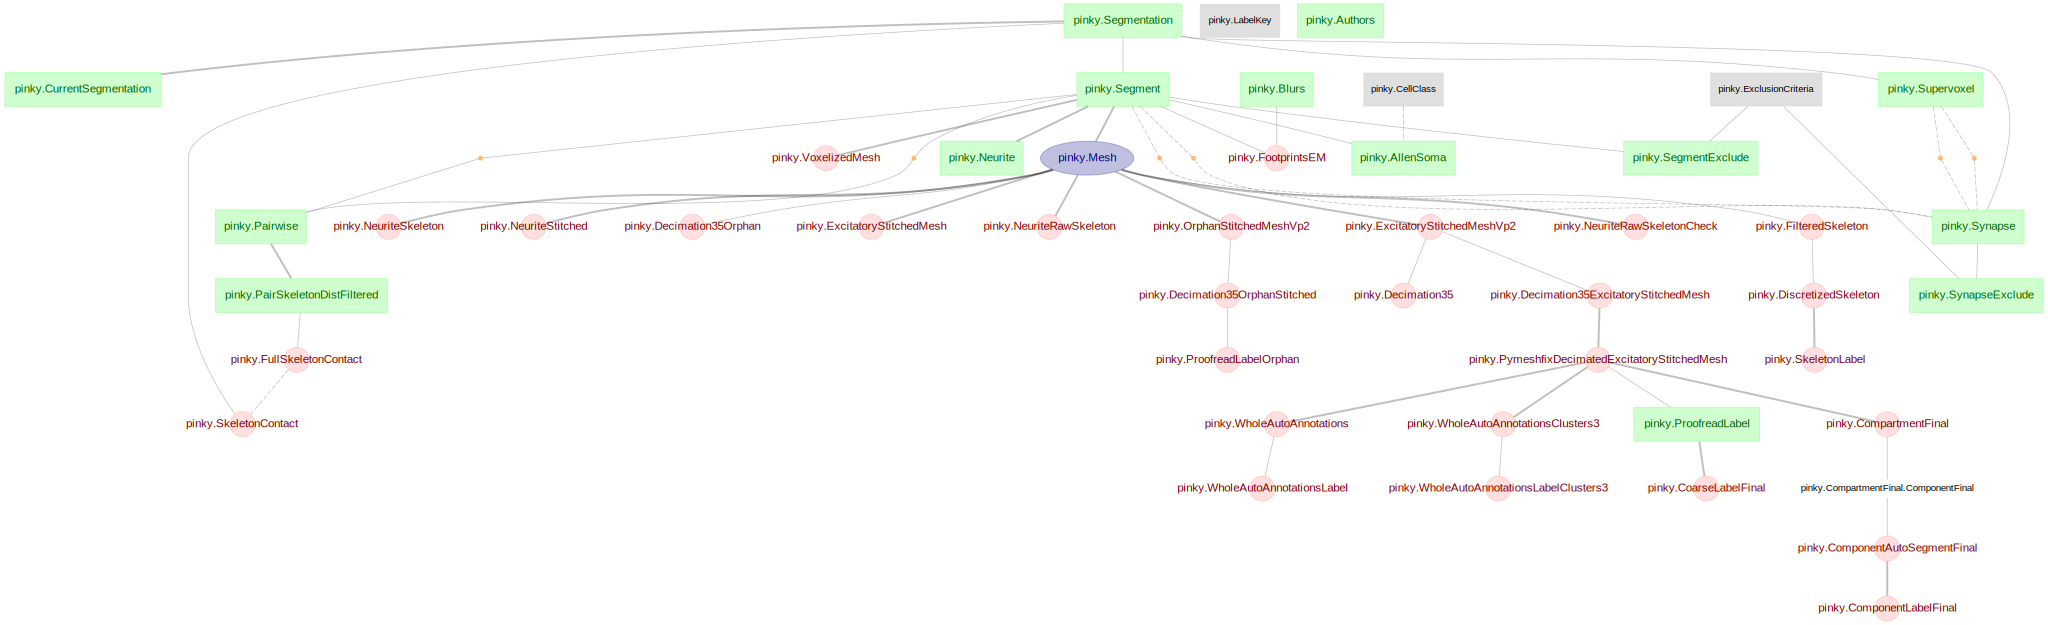

In [8]:
dj.ERD(schema)

In [7]:
pinky.ComponentAutoSegmentWholeStitch()

AttributeError: module 'pinky' has no attribute 'ComponentAutoSegmentWholeStitch'

In [ ]:
################# USE THIS FOR THE AUTOMATED PARAMETER TESTING OF THE SEGMENT
import cgal_Segmentation_Module as csm
import csv
import decimal
import time
import os

@schema
class ComponentAutoSegmentWholeStitch(dj.Computed):
    definition = """
    # creates the labels for the mesh table
    -> pinky.Decimation35ExcitatoryStitchedMesh
    clusters     : tinyint unsigned  #what the clustering parameter was set to
    smoothness   : decimal(3,2)             #what the smoothness parameter was set to, number betwee 0 and 1
    ---
    n_triangles  : int unsigned # number of faces
    seg_group    : longblob     # group segmentation ID's for faces from automatic CGAL segmentation
    sdf          : longblob     #  width values for faces from from automatic CGAL segmentation
    median_sdf   : decimal(6,5) # the median width value for the sdf values
    mean_sdf     : decimal(6,5) #the mean width value for the sdf values
    third_q      : decimal(6,5) #the upper quartile for the mean width values
    ninety_perc  : decimal(6,5) #the 90th percentile for the mean width values
    time_updated : timestamp    # the time at which the segmentation was performed
   
    
   """
    
    key_source = pinky.Decimation35ExcitatoryStitchedMesh & "decimation_ratio=0.35" #& [dict(segment_id=comp) for comp in [50467565,58045989]]#,481423,579228,694582]]
    
    whole_neuron_dicts = dict()
    
    
    def make(self, key):
        
        from cgal_Segmentation_Module import cgal_segmentation
        #key passed to function is just dictionary with the following attributes
        """segmentation
        segment_id
        decimation_ratio
        """
        
        
        #clusters_default = 18
        #smoothness_list = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
        #cluster_list = [2,3,4,5,6]
        
        smoothness_list = [0.3]
        cluster_list = [4]
          
        entire_neuron = (pinky.Decimation35ExcitatoryStitchedMesh & key).fetch1()
        neuron_ID = key["segment_id"]
        component_size = int(entire_neuron["n_triangles"])
        
        print("inside make function with " + str(neuron_ID))
        
        total_dict = list()
        
        for smoothness in smoothness_list:
            
            for clusters in cluster_list:
                start_time = time.time()
                
                #print(str(entire_neuron["segment_id"]) + " cluster:" + str(clusters) 
                #      + " smoothness:" + str(smoothness))

                #generate the off file for each component
                #what need to send them:
                """----From cleansed Mesh---
                vertices
                triangles
                ----From component table--
                n_vertex_indices
                n_triangle_indices
                vertex_indices
                triangle_indices"""

                if key['segment_id'] not in self.whole_neuron_dicts:
                    self.whole_neuron_dicts[key['segment_id']] = (pinky.Decimation35ExcitatoryStitchedMesh & 'decimation_ratio=0.35' & dict(segment_id=key['segment_id'])).fetch1()
                
                
                path_and_filename, off_file_name = write_Whole_Neuron_Off_file(neuron_ID,
                                            self.whole_neuron_dicts[key['segment_id']]["vertices"],
                                            self.whole_neuron_dicts[key['segment_id']]["triangles"])
                
                #print("About to start segmentation")
                
                #will have generated the component file by now so now need to run the segmentation
                csm.cgal_segmentation(path_and_filename,clusters,smoothness)

                #generate the name of the files
                smoothness_str = str(smoothness)
                if(len(smoothness_str)<4):
                    smoothness_str = smoothness_str + "0"
                
                
                
                cgal_file_name = path_and_filename + "-cgal_" + str(clusters) + "_"+str(smoothness_str)
                group_csv_cgal_file = cgal_file_name + ".csv"
                sdf_csv_file_name = cgal_file_name+"_sdf.csv"


                #check if file actually exists
                import os
                exists = os.path.isfile(group_csv_cgal_file)
                
                if( not exists):
                    print("Segmentation not created for " + str(off_file_name))
                    print("################## " + str(neuron_ID) + " ##################")
                    
                    #delete the off file if it exists:
                    #off_exists = os.path.isfile(path_and_filename)
                    print(path_and_filename + ".off")
                    if os.path.isfile(path_and_filename + ".off"):
                        os.remove(path_and_filename + ".off")
                else:


                    with open(group_csv_cgal_file) as f:
                        reader = csv.reader(f)
                        your_list = list(reader)
                    group_list = []
                    for item in your_list:
                        group_list.append(int(item[0]))

                    with open(sdf_csv_file_name) as f:
                        reader = csv.reader(f)
                        your_list = list(reader)
                    sdf_list = []
                    for item in your_list:
                        sdf_list.append(float(item[0]))

                    #print(group_list)
                    #print(sdf_list)

                    #now write them to the datajoint table  
                    #table columns for ComponentAutoSegmentation: segmentation, segment_id, decimation_ratio, compartment_type, component_index, seg_group, sdf
                    comp_dict = dict(key,
                                        clusters=clusters,
                                        smoothness=smoothness,
                                        n_triangles=component_size,
                                        seg_group=group_list,
                                        sdf=sdf_list,
                                        median_sdf=np.median(sdf_list),
                                        mean_sdf=np.mean(sdf_list),
                                        third_q=np.percentile(sdf_list, 75),
                                        ninety_perc=np.percentile(sdf_list, 90),
                                        time_updated=str(datetime.datetime.now())[0:19])

                    total_dict.append(comp_dict)
                    #self.insert1(comp_dict)  #--> only inserting one at a time

                    #then go and erase all of the files used: the sdf files, 
                    real_off_file_name = path_and_filename + ".off"

                    files_to_delete = [group_csv_cgal_file,sdf_csv_file_name,real_off_file_name]
                    for fl in files_to_delete:
                        if os.path.exists(fl):
                            os.remove(fl)
                        else:
                            print(fl + " file does not exist")

                    print("finished")
                    print("--- %s seconds ---" % (time.time() - start_time))
            
            self.insert(total_dict,skip_duplicates=True)
            print("inserted all the dictionaries")
                

In [ ]:
ComponentAutoSegmentWholeStitch.populate(reserve_jobs=True)